# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задание 3. Работа с пропусками

Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [1]:
import pandas as pd
import numpy as np

In [2]:
horses = pd.read_csv('horse_data.csv ', na_values='?')
horses


,2,1,530101,38.50,66,28,3,3.1,?,2.1,...,45.00,8.40,?.4,?.5,2.2,2.3,11300,00000,00000.1,2.4
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
2,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
3,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
4,2.0,1,528355,NaN,NaN,NaN,2.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,1.0,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
295,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
296,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
297,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [3]:
horses.columns =['surgery', 'age', 'Hospital_number', 'r_temperature', 'pulse', 'resp_rate',
                'temperature_of_extremities', 'peripheral_pulse', 'm_membranes', 
                'capillary_refill_time', 'pain', 'peristalsis', 'abd_disten', 'nasogastric_tube',
                'nasogastric_tube', 'nasogastric_reflux', 'nasogastric reflux PH', 'rectal examination_feces',
                'abdomen', 'packed_cell_volume', 'total_pr', 'abdomin_app',
                'abdomcentesis_total_protein', 'outcome', 'surgical_lesion?', 'type_of_lesion', 'type_of_lesion',
                 'cp_data'] 

In [4]:
# Проставим названия столбцов по фрейму

horses

,surgery,age,Hospital_number,r_temperature,pulse,resp_rate,temperature_of_extremities,peripheral_pulse,m_membranes,capillary_refill_time,...,abdomen,packed_cell_volume,total_pr,abdomin_app,abdomcentesis_total_protein,outcome,surgical_lesion?,type_of_lesion,type_of_lesion,cp_data
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
2,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
3,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
4,2.0,1,528355,NaN,NaN,NaN,2.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,1.0,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
295,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
296,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
297,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [ ]:
# Среди всех представленных признаков выбираем только наиболее важные. В выборе ориентируемся на файл
# описания датасета. Например, изначально выбранный показатель "частота дыхания", в итоговой таблице был
# убран - комментарий "usefulness is doubtful due to the great fluctuations"

# Также был понижен в приоритете показатель "периферический пульс" из-за указания на его субъективность.
# Подобные метрики будем использовать в отсутствии иных, более объективных показателей.

# С другой стороны, есть опять же субъективные показатели, но в своих крайних проявлениях, достаточно очевидные.
# Например, цвет слизистых оболочек. Такие вариации, как 5 = bright red / injected и 6 = dark cyanotic
# сложно спутать

# Часть показателей, такие как "хирургическое вмешательство", со сложной кодовой системой, записанной
# в виде одного 4-х значного числа уберем сознательно - такие показатели сложно анализировать. Вероятно,
# придется выделять как отдельную таблицу и разбивать по столбцам. И уже после мерджить со основной 
# таблицей.

# Зато другие показатели, благодаря документации вошли в таблицу: "вздутие живота"

In [5]:
# Выбираем нужные нам столбцы

horses_short = horses[['surgery', 'age', 'r_temperature', 
                       'pulse', 'resp_rate', 'm_membranes', 'abd_disten', 'pain', 
                       'abdomin_app', 'total_pr', 'outcome']]

# Ретроспективно немного сократим названия нужных нам столбцов, оставив для себя расшифровку 
# на будущее:

# mucous_membranes
# abdominal_distension
# rectal_temperature
# respiratory_rate
# abdominocentesis_appearance
# total_protein

horses_short

,surgery,age,r_temperature,pulse,resp_rate,m_membranes,abd_disten,pain,abdomin_app,total_pr,outcome
0,1.0,1,39.2,88.0,20.0,4.0,2.0,3.0,2.0,2.0,2
1,2.0,1,38.3,40.0,24.0,3.0,1.0,3.0,NaN,NaN,2
2,1.0,9,39.1,164.0,84.0,6.0,4.0,2.0,5.3,3.0,1
3,2.0,1,37.3,104.0,35.0,6.0,NaN,NaN,NaN,NaN,2
4,2.0,1,NaN,NaN,NaN,3.0,2.0,2.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1,NaN,120.0,70.0,4.0,NaN,2.0,NaN,NaN,2
295,2.0,1,37.2,72.0,24.0,4.0,3.0,4.0,3.3,3.0,1
296,1.0,1,37.5,72.0,30.0,4.0,3.0,4.0,NaN,NaN,1
297,1.0,1,36.5,100.0,24.0,3.0,3.0,3.0,3.4,3.0,1


In [ ]:
# Далее видим явные выбросы в колонке "Возраст". Даже без доп. исследований. Учитывая, что тут 
# возможны лишь два варианта (1 и 2), такие выбросы явно связаны с ошибками ввода данных. 

# Такая же ситуация со столбцом "abdomin_app". Здесь возможные значения 1,2,3. Но неожиданно 
# появились float и непонятный разброс до 10 и выше.

In [6]:
# Но давайте проверим сколько всего различных уникальных значений есть в столбце "age". По идее, 
# должно быть уже 3. Но может 9 - не единственная ошибка при заполнении таблицы?

# И получаем неожиданный ответ: уникальных значений всего 2... 

len(horses_short['age'].unique())

2

In [7]:
# Убедимся... Действительно, значения 2 в этом столбце просто нет. И тут либо данный столбец был 
# заполнен совершенно некорректно и вместо 2-ек были проставлены 9-ки.

# Либо была ошибка при чтении файла. Потому что 2-ек не было изначально.

horses_short.groupby('age').size()

age
1    275
9     24
dtype: int64

In [8]:
# В любом случае, избавимся от 9-ок

horses_short['age'] = horses_short['age'].replace(to_replace = 9, value = 2)
horses_short

C:\Users\admin1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,surgery,age,r_temperature,pulse,resp_rate,m_membranes,abd_disten,pain,abdomin_app,total_pr,outcome
0,1.0,1,39.2,88.0,20.0,4.0,2.0,3.0,2.0,2.0,2
1,2.0,1,38.3,40.0,24.0,3.0,1.0,3.0,NaN,NaN,2
2,1.0,2,39.1,164.0,84.0,6.0,4.0,2.0,5.3,3.0,1
3,2.0,1,37.3,104.0,35.0,6.0,NaN,NaN,NaN,NaN,2
4,2.0,1,NaN,NaN,NaN,3.0,2.0,2.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1,NaN,120.0,70.0,4.0,NaN,2.0,NaN,NaN,2
295,2.0,1,37.2,72.0,24.0,4.0,3.0,4.0,3.3,3.0,1
296,1.0,1,37.5,72.0,30.0,4.0,3.0,4.0,NaN,NaN,1
297,1.0,1,36.5,100.0,24.0,3.0,3.0,3.0,3.4,3.0,1


In [9]:
# Теперь вернемся к внешнему виду брюшной полости. Еще раз внимательно изучим описание файла данных.
# Возможно, причина в несовпадении столбцов и их названий. Например, согласно описанию, рядом с 
# интересующим нас столбцом "21: abdominocentesis appearance", идет 
# следующий "22: abdomcentesis total protein", значения которого указаны, как "линейные" и 
# в "гмс / дл". Похоже на наши десятичные дроби с большим разбегом значений. 

# Попробуем посмотреть количество уникальных. Очевидно, что значения такого признака должны быть
# весьма индивидуальны, а значит и количество уникальных показателей будет большим.

horses_short.groupby('abdomin_app').size()

abdomin_app
0.1      1
1.0     17
1.3      1
1.4      1
1.5      1
1.6      2
2.0     26
2.1      1
2.2      1
2.3      2
2.5      1
2.6      4
2.8      3
2.9      1
3.0      2
3.2      1
3.3      1
3.4      3
3.6      3
3.7      1
3.9      4
4.1      2
4.3      2
4.4      1
4.5      2
4.7      1
4.8      1
5.0      3
5.2      1
5.3      2
6.0      2
6.6      1
7.0      3
7.4      1
8.0      1
10.0     1
10.1     1
dtype: int64

In [10]:
# Похоже, что так и есть. Переимениуем наш столбец используя метод rename()
# abdomcentesis total protein - abdom_total_prot

horses_short.rename(columns = {'abdomin_app':'abdom_total_prot'}, inplace = True) 
horses_short

C:\Users\admin1\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,surgery,age,r_temperature,pulse,resp_rate,m_membranes,abd_disten,pain,abdom_total_prot,total_pr,outcome
0,1.0,1,39.2,88.0,20.0,4.0,2.0,3.0,2.0,2.0,2
1,2.0,1,38.3,40.0,24.0,3.0,1.0,3.0,NaN,NaN,2
2,1.0,2,39.1,164.0,84.0,6.0,4.0,2.0,5.3,3.0,1
3,2.0,1,37.3,104.0,35.0,6.0,NaN,NaN,NaN,NaN,2
4,2.0,1,NaN,NaN,NaN,3.0,2.0,2.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1,NaN,120.0,70.0,4.0,NaN,2.0,NaN,NaN,2
295,2.0,1,37.2,72.0,24.0,4.0,3.0,4.0,3.3,3.0,1
296,1.0,1,37.5,72.0,30.0,4.0,3.0,4.0,NaN,NaN,1
297,1.0,1,36.5,100.0,24.0,3.0,3.0,3.0,3.4,3.0,1


In [11]:
# Проверим, сколько лошадей выжило в итоге. Таких оказалось почти в два раза больше

horses_short.groupby('outcome').size()

outcome
1    191
2    108
dtype: int64

In [12]:
# Ислледуемая выборка состоит преимущественно из молодых лошадей. Практически все.

# Нормальная температура встречается чаще всего:"нормальная температура 37,8". Мода по пульсу 
# равна 48, что тоже ожидаемо, учитывая, что большинство лошадей молодые. 

# Также видим, что наиболее частые оценки окраски слизистых оболочек и вздутия живота - норма (т.е.
# патологические признаки отсутствуют)

# Нормальный пульс также встречается чаще всего.

# При этом - лошадей, перенесших операцию, больше. 

# Частота дыхания, даже с учетом возраста, явно повышена (норма от 8 до 10). Даже с учетом 
# субъективности показателя - тенденция настораживающая.

# Среди лошадей выборки часто наблюдается периодическая легкая боль (pain = 3). 

horses_short.mode()

,surgery,age,r_temperature,pulse,resp_rate,m_membranes,abd_disten,pain,abdom_total_prot,total_pr,outcome
0,1.0,1,38.0,48.0,20.0,1.0,1.0,3.0,2.0,2.0,1


In [13]:
horses_short.median()

surgery              1.00
age                  1.00
r_temperature       38.20
pulse               64.00
resp_rate           24.00
m_membranes          3.00
abd_disten           2.00
pain                 3.00
abdom_total_prot     2.25
total_pr             2.00
outcome              1.00
dtype: float64

In [14]:
horses_short.mean()

surgery              1.395973
age                  1.080268
r_temperature       38.166527
pulse               71.934545
resp_rate           30.427386
m_membranes          2.853755
abd_disten           2.259259
pain                 2.942623
abdom_total_prot     3.019608
total_pr             2.037037
outcome              1.361204
dtype: float64

In [19]:
import seaborn as sns

In [28]:
horses_short_v = horses_short.pivot_table(
                        index='outcome', 
                        aggfunc=sum).fillna(0)

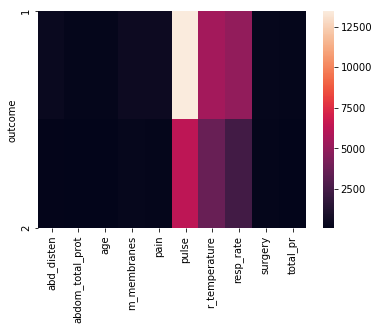

In [29]:
# Видим очень высокую корреляцию между выживаемостью и частотой пульса. Также, похоже, что есть 
# корреляция с ректальной температурой и частотой дыхания. Но, вообще, довольно сложно анализировать.
# Тот же стоблец с пульсом - высокая корряция есть и со смертностью...
sns.heatmap(horses_short_v)

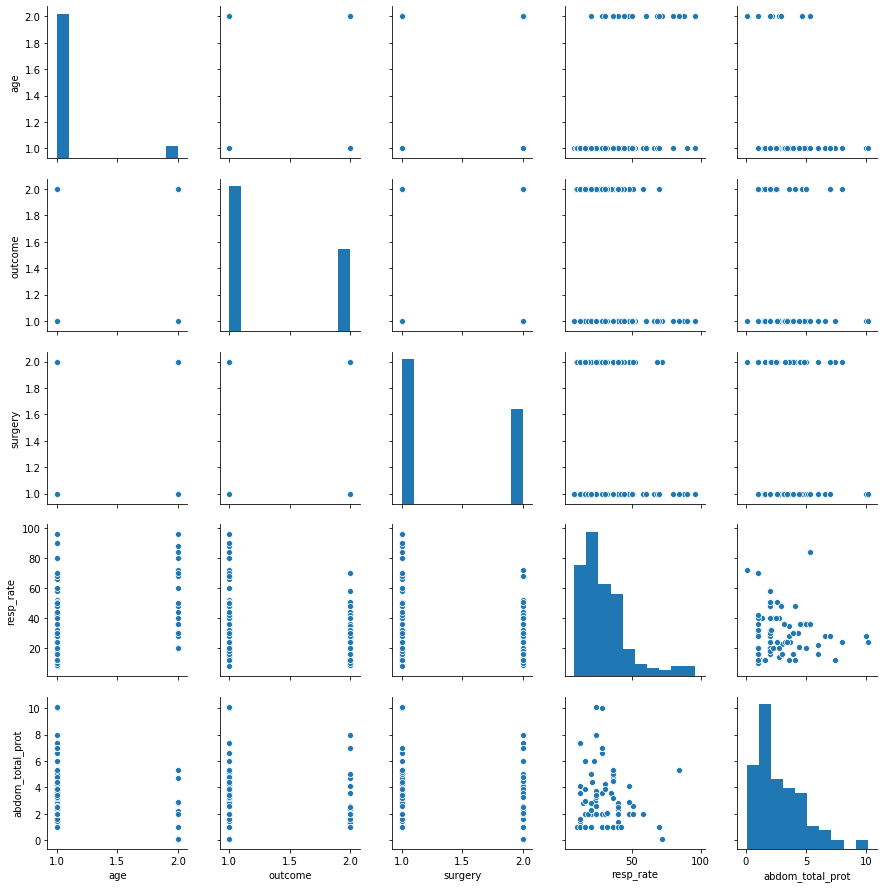

In [24]:
sns.pairplot(horses_short[['age', 'outcome', 'surgery', 'resp_rate', 'abdom_total_prot']])

Резюме: в текущем виде дата фрейм мало пригоден для визуализации. Может быть дело в типах данных, 
а может в плохом качестве их подготовки/обработки. Но скорее всего - в моей нулевой подготовке по статистике) Быссмысленно строить графики, если не понимаешь как их читать. Тем более, если не понимаешь, что вообще хочешь увидеть в итоге.